In [1]:
# !pip install dataframe-image

In [2]:
# !pip install tabulate

Carrega os catalogos do gammapy

Verifica a existencia da fonte em cada um dos catalgos

Guarda a tabela dos pontos de fluxos

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from gammapy.datasets import FluxPointsDataset, Datasets
from gammapy.catalog import CATALOG_REGISTRY

In [5]:
import os
import sys
import importlib

module_path = os.path.abspath('modules/spectral_models')
if module_path not in sys.path:
    sys.path.append(module_path)
# print(module_path)
import spectral_models
importlib.reload(spectral_models)
from spectral_models import pwl_model, get_source_data

module_path = os.path.abspath('modules/utilities')
if module_path not in sys.path:
    sys.path.append(module_path)
# print(module_path)
import utilities
importlib.reload(utilities)
from utilities import mkdir_sub_directory

In [6]:
from astropy import units as u

from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models,
    SuperExpCutoffPowerLaw4FGLDR3SpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
)


In [7]:
def source_identification(src_index = None):
    '''
    To write Docstring!!!!
    '''
    try: 
        
        global LHAASO_name, LHAASO_txt 
        
        LHAASO_name = df_fp["LHAASO_name"][src_index]
        LHAASO_txt = df_fp["LHAASO_txt"][src_index]
        
        global src_name, src_txt
        
        src_name = df_fp["source_name"][src_index]
        src_txt = df_fp["source_txt"][src_index] 
    
    except:
        print("Oops!  That was no valid index.  Try again...")

In [8]:
def plotting_SED_flux_pointing(spec_model = None, sed_type = "e2dnde", yaxis_units="TeV cm-2 s-1", energy_bounds= [1e-5, 1e2] * u.TeV, ylim = [1e-13, 1e-9]):
    '''Returns a spectral energy distribution
    
    >>> plotting_SED_flux_pointing(spec_model, yaxis_units, sed_type, reference)
    '''
    path, path_name = mkdir_sub_directory("catalogs_data", "flux_points_figures")
    
    ax = plt.subplot()
    ax.yaxis.set_units(u.Unit(yaxis_units))
    ax.xaxis.set_units(u.Unit("TeV"))

    #label = f"{sky_model}"
    
    kwargs = {
        "ax": ax, 
        "sed_type": sed_type
    }    
    
    
#     plot_kwargs = {
#     "energy_bounds": [0.1, 30] * u.TeV,
#     "sed_type": "e2dnde",
#     "yunits": u.Unit("erg cm-2 s-1"),
#     "ax": ax,
# }
    
    for d in datasets:
        d.data.plot(label=d.name, **kwargs)

    try:   
        kwargs_fit = {"label":sky_model.name}
        spec_model.plot(energy_bounds=energy_bounds, color="k", **kwargs, **kwargs_fit)
        spec_model.plot_error(energy_bounds=energy_bounds, **kwargs)
        
        file = path_name / f'{LHAASO_txt}_{src_txt}_{sky_model.name}_{catalog_tag}.png'
    
    except:
        file = path_name / f'{LHAASO_txt}_{src_txt}.png'
    
    ax.set_ylim(ylim)
    ax.set_xlim(energy_bounds)
    ax.legend()
    
    plt.title(f"{LHAASO_name}: {src_name}")
    
#     plt.xlabel("Energy (TeV)")   
#     plt.ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")
    
    plt.savefig(file, bbox_inches='tight')
    plt.show()
    
    return 

In [9]:
# import pandas library as pd

import pandas as pd 
from gammapy.datasets import FluxPointsDataset
from gammapy.catalog import CATALOG_REGISTRY
import os
import sys

format_csv = ".csv"
format_fits = ".fits"

sed_type="e2dnde"
# sed_type="dnde"

e_ref_unit = u.TeV

dnde_unit  = u.erg / (u.cm**2 * u.s)

df_columns=[]
ds_fp = []
source_cat = []
  
# create an Empty DataFrame object
df = pd.DataFrame()


def getting_source_data(dict_lhaaso_tevc = None, catalog_tags = None):
    '''
    To write Docstring!!!!
    '''
    
    LHAASO_range = range(len(dict_lhaaso_tevc.keys()))
    for i in LHAASO_range:

        LHAASO_name = list(dict_lhaaso_tevc.keys())[i]
        LHAASO_txt = LHAASO_name.replace(" ", "")
        
        source_range = range(len(dict_lhaaso_tevc[LHAASO_name]))
        for j in source_range:

            cat_src = []

            cat_src_fp = []
            
            src_cat = []

            src_ds = []

            src_name = dict_lhaaso_tevc[LHAASO_name][j]
            src_txt = src_name.replace(" ", "")
            
            catalog_range = range(len(catalog_tags))
            for k in catalog_range: 
                
                catalog_tag = catalog_tags[k]
                catalog = CATALOG_REGISTRY.get_cls(catalog_tag)()
                
                try:
                    
                    src = catalog[src_name]
                    
                    cat_src.append(catalog_tag)
                    
                    ds = FluxPointsDataset(
                        models = src.sky_model(),
                        data=src.flux_points, 
                        name=catalog_tag       
                    )
                    
                    src_cat.append(src)
                    src_ds.append(ds)
                    cat_src_fp.append(catalog_tag)

                    table = ds.data.to_table(
                        sed_type = sed_type, 
                        formatted = True
                    )
                    
                    # Setting the units

#                     try:
#                         table['e_ref'] = table['e_ref'].to(e_ref_unit)
#                         table['e2dnde'] = table['e2dnde'].to(dnde_unit)
#                         table['e2dnde_errp'] = table['e2dnde_errp'].to(dnde_unit)
#                         table['e2dnde_errn'] = table['e2dnde_errn'].to(dnde_unit)

#                     except:
#                         table['e_ref'] = table['e_ref'].to(e_ref_unit)
#                         table['e_min'] = table['e_min'].to(e_ref_unit)
#                         table['e_max'] = table['e_max'].to(e_ref_unit)

#                         table['e2dnde'] = table['e2dnde'].to(dnde_unit)
#                         table['e2dnde_errp'] = table['e2dnde_errp'].to(dnde_unit)
#                         table['e2dnde_errn'] = table['e2dnde_errn'].to(dnde_unit)    
#                         table['e2dnde_ul'] = table['e2dnde_ul'].to(dnde_unit)
                    
                    #########################
                    
                    # Writes the flux points table in the fits format
                    file_name = f'{LHAASO_txt}_{src_txt}_{catalog_tag}{format_fits}'
                    path_os = os.path.abspath(
                        os.path.join(
                            f"{path_flux_points_tables}/{file_name}"
                        )
                    )      
                    
                    if path_os not in sys.path:
                        sys.path.append(path_os)

                    table.write(
                        f"{path_os}",
                        format = 'fits', 
                        overwrite = True
                    )
                    
                    # Writes the flux points table in the csv format
                    file_name = f'{LHAASO_txt}_{src_txt}_{catalog_tag}{format_csv}'
                    path_os = os.path.abspath(
                        os.path.join(
                            f"{path_flux_points_tables}/{file_name}"
                        )
                    )
                     
                    if path_os not in sys.path:
                        sys.path.append(path_os)

                    table.write(
                        f"{path_os}",
                        format = 'ascii.ecsv', 
                        overwrite = True
                    )   
                    
                except:
                    pass

                df_columns_k = [LHAASO_name, LHAASO_txt, src_name, src_txt, cat_src, cat_src_fp]
            df_columns.append(df_columns_k)
            ds_fp.append(src_ds)
            source_cat.append(src_cat)

    df = pd.DataFrame(df_columns, columns = ['LHAASO_name', "LHAASO_txt",'source_name', "source_txt", 'catalog', 'flux_points']) 
    df_fp = df[df["flux_points"].str.len() != 0]
    df_fp = df_fp.reset_index(drop = True)
    df_fp.index.name = 'source_index'
    df_fp.to_csv(f"{path_catalogs_data}/data_frame_flux_points.csv", index = "True" )
    
    df_no_fp = df[df["flux_points"].str.len() == 0]
    df_no_fp = df_no_fp.reset_index(drop = True)
    df_no_fp.index.name = 'source_index'
    df_no_fp.to_csv(f"{path_catalogs_data}/data_frame_no_flux_points.csv", index = "True" )
    print(f"Sources without flux points table: {list(df_no_fp['source_name'])}")
    
    source_cat[:] = list(filter(None, source_cat))
    ds_fp[:] = list(filter(None, ds_fp))
    
    return df_fp, ds_fp, source_cat

In [10]:
import numpy as np
# from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.utils.scripts import make_path

# format_csv = ".csv"
format_fits = ".fits"

sed_type="e2dnde"
# sed_type="dnde"



ds_fp_cut = []
def flux_points_cut_energy(df_fp = None, ds_fp = None, e_ref_min=None):
    '''To write Docstring!!!!'''
    
    source_range = range(len(df_fp))
    for src_index in source_range:
        src_ds = []
        
        LHAASO_txt = df_fp["LHAASO_txt"][src_index]

        src_txt = df_fp["source_txt"][src_index]
        
        k_range = range(len(ds_fp[src_index]))
        for k in k_range: 
            
            catalog_tag = df_fp["catalog"][src_index][k]
            ds_name = ds_fp[src_index][k].name
            
            flux_points = ds_fp[src_index][k].data

            mask_energy = np.zeros(len(flux_points.to_table()), dtype=bool)

            for m, e_ref in enumerate(flux_points.energy_ref):
                if e_ref > e_ref_min:
                    mask_energy[m] = True
            print(ds_name, src_txt)        
            flux_points_mask = flux_points.to_table()[mask_energy]
            flux_points_energy = FluxPoints.from_table(flux_points_mask)

            ds = FluxPointsDataset(
                                data=flux_points_energy, 
                                name=ds_name
                            )

            table = ds.data.to_table(
                                sed_type = sed_type, 
                                formatted = True
                            )
            src_ds.append(ds)
            
            file_name = f'{LHAASO_txt}_{src_txt}_{catalog_tag}_e_ref_min_{e_ref_min_name}{format_fits}'
            path_os = os.path.abspath(
                os.path.join(
                    f"{path_flux_points_figures}/{file_name}"
                )
            )

            if path_os not in sys.path:
                sys.path.append(path_os)

            # table.write(f"{path_os}{format_csv}",format='ascii.ecsv', overwrite=True)
            table.write(f"{path_os}",format='fits', overwrite=True)
    #         print(f"{file_name}")
        ds_fp_cut.append(src_ds)
    return ds_fp_cut

Loading the catalogs and sources to be studied

In [11]:
# print(CATALOG_REGISTRY)

In [12]:
catalog_tags = ["gamma-cat", "hgps", "2hwc", "3fgl", "4fgl", "2fhl", "3fhl", "3hwc"] 

In [13]:
# Loading the source catalogs
catalog_gammacat = CATALOG_REGISTRY.get_cls("gamma-cat")()
catalog_hgps = CATALOG_REGISTRY.get_cls("hgps")()
catalog_2hwc = CATALOG_REGISTRY.get_cls("2hwc")()
catalog_3fgl = CATALOG_REGISTRY.get_cls("3fgl")()
catalog_4fgl = CATALOG_REGISTRY.get_cls("4fgl")()
catalog_2fhl = CATALOG_REGISTRY.get_cls("2fhl")()
catalog_3fhl = CATALOG_REGISTRY.get_cls("3fhl")()
catalog_3hwc = CATALOG_REGISTRY.get_cls("3hwc")()

In [ ]:
# Creating a dictionary of the Potential TeV Counterparts (dict values) 
# of the three most significant (excluding Crab) LHASSO observations (dict keys)
# see https://www.nature.com/articles/s41586-021-03498-z
dict_lhaaso_tevc = {
    "LHAASO J1825-1326": ["HESS J1825-137", "HESS J1826-130", "2HWC J1825-134"], 
    "LHAASO J1908+0621": ["MGRO J1908+06" , "HESS J1908+063", "ARGO J1907+0627", "VER J1907+062", "2HWC J1908+063"], 
    "LHAASO J2226+6057": ["VER J2227+608"  , "Boomerang"]
}

In [59]:
catalog_tag = catalog_tags[4]
catalog = CATALOG_REGISTRY.get_cls(catalog_tag)()
src = catalog["HESS J1825-137"]
table = src.flux_points.to_table(sed_type = sed_type)

In [60]:
display(table)

e_ref,e_min,e_max,e2dnde,e2dnde_errp,e2dnde_errn,e2dnde_ul,sqrt_ts,is_ul
MeV,MeV,MeV,MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
70.71067811865478,49.99999999999999,100.00000000000004,3.281859501525316e-08,3.9504709932181726e-05,nan,7.904223861809603e-05,0.0,True
173.20508075688775,100.00000000000004,299.99999999999994,2.0818851245466358e-07,1.5344609464122156e-05,nan,3.089740854382557e-05,0.0,True
547.722557505166,299.99999999999994,999.9999999999998,4.32498564437942e-06,3.5155869846878234e-06,3.5726278650894586e-06,nan,1.2146629,False
1732.0508075688763,999.9999999999998,2999.9999999999977,7.990703631890635e-06,1.5610843217601462e-06,1.544302840639978e-06,nan,5.217925,False
5477.225575051666,2999.9999999999977,10000.00000000001,1.5401721896861198e-05,1.3937241742379425e-06,1.3937241742379425e-06,nan,11.553127,False
17320.50807568877,10000.00000000001,30000.000000000007,2.1236455475506752e-05,1.902212544807774e-06,1.902212544807774e-06,nan,12.197048,False
54772.255750516626,30000.000000000007,100000.00000000001,2.992269676576556e-05,2.7781173891170413e-06,2.7781173891170413e-06,nan,12.737162,False
316227.7660168382,100000.00000000001,999999.9999999995,3.647185846402396e-05,4.030735591367832e-06,3.856327331918008e-06,nan,12.315137,False


In [61]:
table["e_ref"].to(u.TeV)

<Quantity [7.07106781e-05, 1.73205081e-04, 5.47722558e-04, 1.73205081e-03,
           5.47722558e-03, 1.73205081e-02, 5.47722558e-02, 3.16227766e-01] TeV>

In [63]:
table["e_ref"]

70.71067811865478
173.20508075688775
547.722557505166
1732.0508075688763
5477.225575051666
17320.50807568877
54772.255750516626
316227.7660168382


e_ref,e_min,e_max,e2dnde,e2dnde_errp,e2dnde_errn,e2dnde_ul,sqrt_ts,is_ul
MeV,MeV,MeV,MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
70.71067811865478,49.99999999999999,100.00000000000004,3.281859501525316e-08,3.9504709932181726e-05,nan,7.904223861809603e-05,0.0,True
173.20508075688775,100.00000000000004,299.99999999999994,2.0818851245466358e-07,1.5344609464122156e-05,nan,3.089740854382557e-05,0.0,True
547.722557505166,299.99999999999994,999.9999999999998,4.32498564437942e-06,3.5155869846878234e-06,3.5726278650894586e-06,nan,1.2146629,False
1732.0508075688763,999.9999999999998,2999.9999999999977,7.990703631890635e-06,1.5610843217601462e-06,1.544302840639978e-06,nan,5.217925,False
5477.225575051666,2999.9999999999977,10000.00000000001,1.5401721896861198e-05,1.3937241742379425e-06,1.3937241742379425e-06,nan,11.553127,False
17320.50807568877,10000.00000000001,30000.000000000007,2.1236455475506752e-05,1.902212544807774e-06,1.902212544807774e-06,nan,12.197048,False
54772.255750516626,30000.000000000007,100000.00000000001,2.992269676576556e-05,2.7781173891170413e-06,2.7781173891170413e-06,nan,12.737162,False
316227.7660168382,100000.00000000001,999999.9999999995,3.647185846402396e-05,4.030735591367832e-06,3.856327331918008e-06,nan,12.315137,False


In [70]:
table['e_ref'] = table['e_ref'].to(e_ref_unit)
table['e_ref']

7.071067811865478e-05
0.00017320508075688776
0.000547722557505166
0.0017320508075688763
0.005477225575051666
0.01732050807568877
0.05477225575051663
0.31622776601683816


In [68]:
table = src.flux_points.to_table(sed_type = sed_type)
table['e_ref']

70.71067811865478
173.20508075688775
547.722557505166
1732.0508075688763
5477.225575051666
17320.50807568877
54772.255750516626
316227.7660168382


In [67]:
table

e_ref,e_min,e_max,e2dnde,e2dnde_errp,e2dnde_errn,e2dnde_ul,sqrt_ts,is_ul
TeV,MeV,MeV,MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
7.071067811865478e-05,49.99999999999999,100.00000000000004,3.281859501525316e-08,3.9504709932181726e-05,nan,7.904223861809603e-05,0.0,True
0.00017320508075688776,100.00000000000004,299.99999999999994,2.0818851245466358e-07,1.5344609464122156e-05,nan,3.089740854382557e-05,0.0,True
0.000547722557505166,299.99999999999994,999.9999999999998,4.32498564437942e-06,3.5155869846878234e-06,3.5726278650894586e-06,nan,1.2146629,False
0.0017320508075688763,999.9999999999998,2999.9999999999977,7.990703631890635e-06,1.5610843217601462e-06,1.544302840639978e-06,nan,5.217925,False
0.005477225575051666,2999.9999999999977,10000.00000000001,1.5401721896861198e-05,1.3937241742379425e-06,1.3937241742379425e-06,nan,11.553127,False
0.01732050807568877,10000.00000000001,30000.000000000007,2.1236455475506752e-05,1.902212544807774e-06,1.902212544807774e-06,nan,12.197048,False
0.05477225575051663,30000.000000000007,100000.00000000001,2.992269676576556e-05,2.7781173891170413e-06,2.7781173891170413e-06,nan,12.737162,False
0.31622776601683816,100000.00000000001,999999.9999999995,3.647185846402396e-05,4.030735591367832e-06,3.856327331918008e-06,nan,12.315137,False


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


<AxesSubplot: xlabel='Energy [TeV]', ylabel='dnde [1 / (cm2 s TeV)]'>

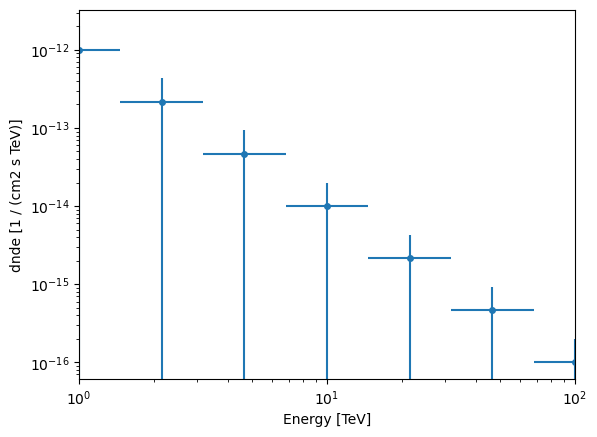

In [22]:
import numpy as np
from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.modeling.models import PowerLawSpectralModel
table = Table()
pwl = PowerLawSpectralModel()
e_ref = np.geomspace(1, 100, 7) * u.TeV
table["e_ref"] = e_ref
table["dnde"] = pwl(e_ref)
table["dnde_err"] = pwl.evaluate_error(e_ref)[0]
table.meta["SED_TYPE"] = "dnde"
flux_points = FluxPoints.from_table(table)
flux_points.plot(sed_type="dnde") 

In [23]:

table = src.flux_points.to_table(sed_type = sed_type)
# <TableColumns names=('e_ref','e2dnde','e2dnde_errp','e2dnde_errn','is_ul')>
# <TableColumns names=('e_ref','e_min','e_max','e2dnde','e2dnde_errp','e2dnde_errn','e2dnde_ul','is_ul')>
# <TableColumns names=('e_ref','e_min','e_max','e2dnde','e2dnde_errp','e2dnde_errn','e2dnde_ul','sqrt_ts','is_ul')>
# <TableColumns names=('e_ref','e_min','e_max','e2dnde','e2dnde_errp','e2dnde_errn','e2dnde_ul','sqrt_ts','is_ul')>
# <TableColumns names=('e_ref','e_min','e_max','e2dnde','e2dnde_errp','e2dnde_errn','e2dnde_ul','sqrt_ts','is_ul')>
# <TableColumns names=('e_ref','e_min','e_max','e2dnde','e2dnde_errp','e2dnde_errn','e2dnde_ul','is_ul')>
display(table.columns)

<TableColumns names=('e_ref','e_min','e_max','e2dnde','e2dnde_errp','e2dnde_errn','e2dnde_ul','sqrt_ts','is_ul')>

In [24]:
table["e_ref"].to(u.GeV)

<Quantity [7.07106781e-02, 1.73205081e-01, 5.47722558e-01, 1.73205081e+00,
           5.47722558e+00, 1.73205081e+01, 5.47722558e+01, 3.16227766e+02] GeV>

In [25]:
table2 = table
table2["e_ref"] = table["e_ref"].to(u.MeV)

In [26]:
table2["e_ref"].unit = 'PeV'
table2.meta["SED_TYPE"] = "2dnde"
table2["e_ref"]

70.71067811865478
173.20508075688775
547.722557505166
1732.0508075688763
5477.225575051666
17320.50807568877
54772.255750516626
316227.7660168382


In [28]:
# Creating the directories to save the flux points tables
dir_catalogs_data = "catalogs_data"
dir_flux_points_tables = "flux_points_tables"

# Tables
path_catalogs_data, path_flux_points_tables = mkdir_sub_directory(
    dir_catalogs_data, 
    dir_flux_points_tables
)


Directory 'catalogs_data/flux_points_tables' created


In [29]:
path_catalogs_data

PosixPath('catalogs_data')

In [30]:
# Getting the data of the sources from the catalogs of the Gammapy package
df_fp, ds_fp, source_cat = getting_source_data(dict_lhaaso_tevc, catalog_tags)

Sources without flux points table: ['2HWC J1825-134', '2HWC J1908+063', 'VER J2227+608']


In [31]:
df_fp

,LHAASO_name,LHAASO_txt,source_name,source_txt,catalog,flux_points
source_index,,,,,,
0,LHAASO J1825-1326,LHAASOJ1825-1326,HESS J1825-137,HESSJ1825-137,"[gamma-cat, hgps, 3fgl, 4fgl, 2fhl, 3fhl]","[gamma-cat, hgps, 3fgl, 4fgl, 2fhl, 3fhl]"
1,LHAASO J1825-1326,LHAASOJ1825-1326,HESS J1826-130,HESSJ1826-130,"[gamma-cat, hgps, 4fgl, 3fhl]","[gamma-cat, hgps, 4fgl, 3fhl]"
2,LHAASO J1908+0621,LHAASOJ1908+0621,MGRO J1908+06,MGROJ1908+06,"[gamma-cat, 3fgl, 4fgl]","[gamma-cat, 3fgl, 4fgl]"
3,LHAASO J1908+0621,LHAASOJ1908+0621,HESS J1908+063,HESSJ1908+063,"[gamma-cat, hgps]","[gamma-cat, hgps]"
4,LHAASO J1908+0621,LHAASOJ1908+0621,ARGO J1907+0627,ARGOJ1907+0627,[gamma-cat],[gamma-cat]
5,LHAASO J1908+0621,LHAASOJ1908+0621,VER J1907+062,VERJ1907+062,[gamma-cat],[gamma-cat]
6,LHAASO J2226+6057,LHAASOJ2226+6057,Boomerang,Boomerang,"[3fgl, 4fgl]","[3fgl, 4fgl]"


In [32]:
display(ds_fp[0][0].data.to_table(sed_type = sed_type))

e_ref,e2dnde,e2dnde_errp,e2dnde_errn,is_ul
TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),
float64,float64,float64,float64,bool
0.27761900424957275,2.6479734514473474e-11,1.736030761165361e-12,1.7353678807888707e-12,False
0.4302450120449066,2.4009052019210835e-11,9.936153475961044e-13,9.9308229503768e-13,False
0.6917189955711365,2.3759736432297907e-11,8.061445508076921e-13,8.054028741777694e-13,False
1.114240050315857,1.9967293021000508e-11,7.488380592888212e-13,7.477777595655411e-13,False
1.79312002658844,1.6199348761020104e-11,7.621691458852759e-13,7.60780144028183e-13,False
2.888400077819824,1.5246567170533285e-11,8.220431818929284e-13,8.199641666765423e-13,False
4.652699947357178,1.0900050755492023e-11,9.098255369876038e-13,9.073014428927898e-13,False
7.501949787139891,8.25903664302632e-12,9.91398403859822e-13,9.876333019451728e-13,False


### LHAASOJ1825-1326: HESSJ1825-137

In [33]:
# Creating the directories to save the figures
dir_flux_points_figures = "flux_points_figures"

# Figures
path_catalogs_data, path_flux_points_figures = mkdir_sub_directory(
    dir_catalogs_data, 
    dir_flux_points_figures
)

Directory 'catalogs_data/flux_points_figures' created


In [34]:
path_catalogs_data, path_flux_points_figures = mkdir_sub_directory(
    dir_catalogs_data, 
    dir_flux_points_figures
)

Directory 'catalogs_data/flux_points_figures' created


In [35]:
ds_fp[0][0].data.to_table(sed_type = sed_type)

e_ref,e2dnde,e2dnde_errp,e2dnde_errn,is_ul
TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),
float64,float64,float64,float64,bool
0.27761900424957275,2.6479734514473474e-11,1.736030761165361e-12,1.7353678807888707e-12,False
0.4302450120449066,2.4009052019210835e-11,9.936153475961044e-13,9.9308229503768e-13,False
0.6917189955711365,2.3759736432297907e-11,8.061445508076921e-13,8.054028741777694e-13,False
1.114240050315857,1.9967293021000508e-11,7.488380592888212e-13,7.477777595655411e-13,False
1.79312002658844,1.6199348761020104e-11,7.621691458852759e-13,7.60780144028183e-13,False
2.888400077819824,1.5246567170533285e-11,8.220431818929284e-13,8.199641666765423e-13,False
4.652699947357178,1.0900050755492023e-11,9.098255369876038e-13,9.073014428927898e-13,False
7.501949787139891,8.25903664302632e-12,9.91398403859822e-13,9.876333019451728e-13,False


In [36]:
ee = 7.360350812019913e-12 * u.TeV 
ee.to(u.erg)

<Quantity 1.17925821e-11 erg>

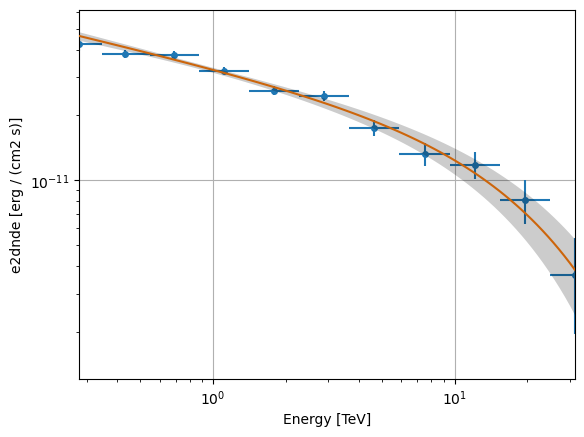

In [37]:
ds_fp[0][0].plot_spectrum()
plt.grid(True)


In [39]:
ds_fp[0][5].data.to_table(sed_type = sed_type)

e_ref,e_min,e_max,e2dnde,e2dnde_errp,e2dnde_errn,e2dnde_ul,sqrt_ts,is_ul
GeV,GeV,GeV,GeV / (cm2 s),GeV / (cm2 s),GeV / (cm2 s),GeV / (cm2 s),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
14.142135623730955,10.000000000000002,19.999999999999996,1.655960126409686e-08,2.49181902800831e-09,2.4065416328604926e-09,nan,7.4071417,False
31.62277660168379,19.999999999999996,49.99999999999999,2.3449786806637767e-08,2.9306777695878095e-09,2.892018583973119e-09,nan,9.3439455,False
86.60254037844388,49.99999999999999,149.99999999999997,2.867526880212117e-08,4.151607522676215e-09,3.958107408618686e-09,nan,8.718214,False
273.86127875258296,149.99999999999997,499.99999999999983,3.700340793810991e-08,6.515169080125563e-09,6.053904272845292e-09,nan,8.078102,False
999.9999999999998,499.99999999999983,1999.9999999999998,2.9364044933936206e-08,1.1213107658151257e-08,1.0480254855578688e-08,nan,3.513798,False


Directory 'catalogs_data/flux_points_figures' created


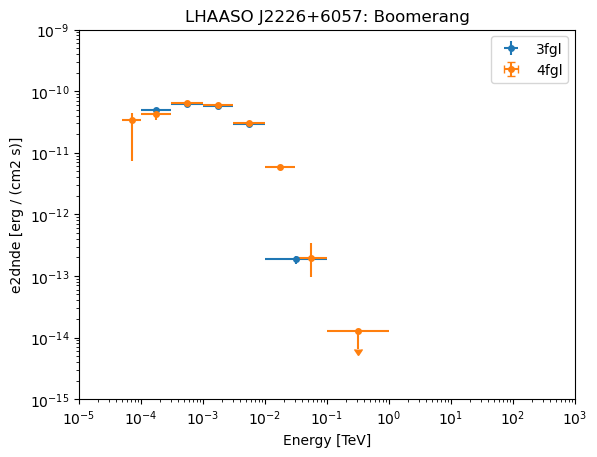

In [40]:
# to select a source object index: [0-6]
src_index = 6

source_identification(src_index)

ds_src = ds_fp[src_index]
datasets = Datasets(ds_src)

energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-15, 1e-9]

plotting_SED_flux_pointing(
    sed_type = sed_type, 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [41]:
e_ref_min = 10 * u.Unit("GeV")
e_ref_min_name = str(e_ref_min).replace(" ", "")

In [42]:
dir_flux_points_cut = f"flux_points_table_e_ref_min_{e_ref_min_name}"
dir_flux_points_cut

'flux_points_table_e_ref_min_10.0GeV'

In [43]:
# Creating the directories to save the figures
dir_analysis = "analysis"
dir_flux_points_cut = "flux_points_figures"

# Figures
path_catalogs_data, path_flux_points_figures = mkdir_sub_directory(
    dir_analysis, 
    dir_flux_points_figures
)

Directory 'analysis/flux_points_figures' created


In [44]:
# Defining the minimum value of the reference energy  
e_ref_min = 10 * u.Unit("GeV")
e_ref_min_name = str(e_ref_min).replace(" ", "")

In [45]:
ds_fp_cut = flux_points_cut_energy(df_fp = df_fp, ds_fp = ds_fp, e_ref_min=e_ref_min)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


gamma-cat HESSJ1825-137
hgps HESSJ1825-137
3fgl HESSJ1825-137


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


4fgl HESSJ1825-137
2fhl HESSJ1825-137
3fhl HESSJ1825-137
gamma-cat HESSJ1826-130


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


hgps HESSJ1826-130
4fgl HESSJ1826-130
3fhl HESSJ1826-130
gamma-cat MGROJ1908+06
3fgl MGROJ1908+06


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


4fgl MGROJ1908+06
gamma-cat HESSJ1908+063
hgps HESSJ1908+063
gamma-cat ARGOJ1907+0627
gamma-cat VERJ1907+062


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


3fgl Boomerang
4fgl Boomerang


In [ ]:
print(source_cat[src_index][2].spectral_model())

In [ ]:
spec_model = LogParabolaSpectralModel(
    alpha=2, 
    amplitude="1e-12 cm-2 s-1 TeV-1", 
    reference="1 TeV", 
    beta=0.1
)

sky_model = SkyModel(spectral_model=spec_model, name="logparabola")

In [ ]:
datasets = Datasets(ds_src)
datasets.models = sky_model

fitter = Fit()

result_log_parabola = fitter.run(datasets=datasets)

In [ ]:
print(result_log_parabola.models)

In [ ]:
energy_bounds = [1e-3, 1e3] * u.TeV
ylim = [1e-13, 1e-9]
plotting_SED_flux_pointing(sed_type = "e2dnde", yaxis_units="erg cm-2 s-1", energy_bounds=energy_bounds, ylim=ylim)

In [ ]:
ds_fp

In [ ]:
print(ds_fp[0][5].data.reference_spectral_model.tag[1])

In [ ]:
from pandas import read_csv

myData = read_csv(f"{path_flux_points_tables}/data_frame_flux_points.csv", index_col = "source_index")

In [ ]:
file_name

In [71]:
src_index = 1
source_identification(src_index)
catalog_tag = df_fp["catalog"][src_index][1]

file_name = f'{LHAASO_txt}_{src_txt}_{catalog_tag}{format_fits}'
file_path = make_path(f"{path_flux_points_tables}/{file_name}")
flux_points = FluxPoints.from_table(file_path)
display(flux_points.to_table())

ValueError: Data type <class 'pathlib.PosixPath'> not allowed to init Table

In [74]:
src_index = 0
source_identification(src_index)
catalog_tag = df_fp["catalog"][src_index][0]

file_name = f'{LHAASO_txt}_{src_txt}_{catalog_tag}{format_fits}'
file_path = make_path(f"{path_flux_points_tables}/{file_name}")
flux_points = FluxPoints.read(file_path, sed_type=sed_type)
ds = FluxPointsDataset(
    data = flux_points, 
    name = "ds_name"
)
datasets = Datasets(ds)


# opts = dict(sed_type="e2dnde", yunits=u.Unit("TeV cm-2 s-1"))
energy_bounds = [1e-3, 1e3] * u.TeV
ylim = [1e-13, 1e-9]
plotting_SED_flux_pointing(sed_type = "e2dnde", yaxis_units="erg cm-2 s-1", energy_bounds=energy_bounds, ylim=ylim)


ValueError: Format not supported ascii.csv

In [ ]:
print(ds_fp[src_index][2].data.to_table())

In [ ]:
print(ds_fp_cut[src_index][2].data.to_table())

In [57]:

src_index = 0
source_identification(src_index)
catalog_tag = df_fp["catalog"][src_index][0]

# file_name = f'{LHAASO_txt}_{src_txt}_{catalog_tag}_cut_{e_ref_min_name}{format_fits}'
file_name = f'{LHAASO_txt}_{src_txt}_{catalog_tag}{format_fits}'

file_path = make_path(f"{path_flux_points_tables}/{file_name}")
file_path

PosixPath('catalogs_data/flux_points_tables/LHAASOJ1825-1326_HESSJ1825-137_gamma-cat.fits')

In [58]:
flux_points_energy = FluxPoints.read(file_path, sed_type=sed_type)
flux_points_energy.to_table()

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


e_ref,e2dnde,e2dnde_errp,e2dnde_errn,is_ul
TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),
float64,float64,float64,float64,bool
0.27761900424957275,2.6479734514473474e-11,1.736030761165361e-12,1.7353678807888707e-12,False
0.4302450120449066,2.4009052019210835e-11,9.936153475961044e-13,9.9308229503768e-13,False
0.6917189955711365,2.3759736432297907e-11,8.061445508076921e-13,8.054028741777694e-13,False
1.114240050315857,1.9967293021000508e-11,7.488380592888212e-13,7.47777759565541e-13,False
1.79312002658844,1.6199348761020104e-11,7.621691458852759e-13,7.60780144028183e-13,False
2.888400077819824,1.5246567170533285e-11,8.220431818929284e-13,8.199641666765424e-13,False
4.652699947357178,1.0900050755492023e-11,9.098255369876038e-13,9.073014428927898e-13,False
7.501949787139891,8.25903664302632e-12,9.91398403859822e-13,9.876333019451728e-13,False


In [ ]:
print(source_cat[src_index][0].flux_points_table)

In [ ]:
flux_points = FluxPoints.from_table(flux_points.to_table(), sed_type="e2dnde")
flux_points.plot()

ds = FluxPointsDataset(
    data = flux_points, 
    name = "ds_name"
)

In [ ]:
flux_points.plot(sed_type="e2dnde") 

In [ ]:
spec_model = LogParabolaSpectralModel(
    alpha=2, 
    amplitude="1e-12 cm-2 s-1 TeV-1", 
    reference="1 TeV", 
    beta=0.1
)

sky_model = SkyModel(spectral_model=spec_model, name="logparabola")

datasets = Datasets(ds)
datasets.models = sky_model

fitter = Fit()

result_log_parabola = fitter.run(datasets=datasets)

# opts = dict(sed_type="e2dnde", yunits=u.Unit("TeV cm-2 s-1"))
energy_bounds = [1e-3, 1e3] * u.TeV
ylim = [1e-13, 1e-9]
plotting_SED_flux_pointing(spec_model=spec_model, sed_type = "e2dnde", yaxis_units="erg cm-2 s-1", energy_bounds=energy_bounds, ylim=ylim)

In [ ]:
print(datasets)

In [ ]:
flux_points_energy.plot() 

### LHAASOJ1825-1326: HESSJ1826-130

In [ ]:
# to select a source object index: [0-6]
src_index = 6
cat_index = 1
# src = source_cat[src_index][0]

LHAASO_txt = df_fp["LHAASO_txt"][src_index]
LHAASO_name = df_fp["LHAASO_name"][src_index]

src_txt = df_fp["source_txt"][src_index]
src_name = df_fp["source_name"][src_index]

ds_src = ds_fp_cut[src_index]


In [ ]:
print(source_cat[src_index][cat_index].spectral_model())

In [ ]:
# help(SuperExpCutoffPowerLaw4FGLDR3SpectralModel())

In [ ]:
spec_model = source_cat[src_index][cat_index].spectral_model()

sky_model = SkyModel(spectral_model=spec_model, name=spec_model.tag[1])

In [ ]:
datasets = Datasets(ds_src)
datasets.models = sky_model

fitter = Fit()

result_log_parabola = fitter.run(datasets=datasets)

In [ ]:
print(result_log_parabola.models)

In [ ]:
energy_bounds = [1e-3, 1e3] * u.TeV
ylim = [1e-16, 1e-9]
plotting_SED_flux_pointing(spec_model=spec_model, sed_type = "e2dnde", yaxis_units="erg cm-2 s-1", energy_bounds=energy_bounds, ylim=ylim)

In [ ]:
datasets.names

In [ ]:
ds_src[1].mask_safe

In [ ]:
#load precomputed flux points
filename = "$GAMMAPY_DATA/tests/spectrum/flux_points/diff_flux_points.fits"
flux_points = FluxPoints.read(filename)
model = SkyModel(spectral_model=PowerLawSpectralModel())
dataset = FluxPointsDataset(model, flux_points)
#configuring optional parameters
kwargs_spectrum = {"kwargs_model": {"color":"red", "ls":"--"}, "kwargs_fp":{"color":"green", "marker":"o"}}  # noqa: E501
kwargs_residuals = {"color": "blue", "markersize":4, "marker":'s', }
dataset.plot_fit(kwargs_residuals=kwargs_residuals, kwargs_spectrum=kwargs_spectrum) 

In [ ]:
flux_points = FluxPoints.read(filename)
flux_points.to_table()

In [ ]:
flux_points.energy_ref.to(u.TeV)

"QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ

In [ ]:
flux_points.plot() 


In [ ]:
flux_points_energy = FluxPoints.from_table(flux_points_mask)


In [ ]:
flux_points_energy.plot() 


In [ ]:
flux_points_cut_energy()

In [ ]:
type(catalog_3fhl_bright)

In [ ]:
type(flux_points1.dnde)

In [ ]:
type(flux_points.dnde)

In [ ]:
flux_points1 = FluxPoints.from_table(catalog_3fhl_bright)


In [ ]:
flux_points1.plot(sed_type="e2dnde") 


In [ ]:
sed_type="e2dnde"


energy_bounds = [1e-7, 1e2] * energy_unit
ylim = [1e-20, 1e-9]
yaxis_units= flux_unit

# flux_points = FluxPoints.read(filename)
flux_points = ds_fp[4][0].data

ax = plt.subplot()
ax.yaxis.set_units(u.Unit(yaxis_units))
ax.xaxis.set_units(u.Unit(energy_unit))

kwargs = {
    "ax": ax, 
    "sed_type": sed_type
}    

flux_points.plot(label=catalog_tag, **kwargs) 

ax.set_ylim(ylim)
ax.set_xlim(energy_bounds)
ax.legend()

plt.title(f"{LHAASO_txt}: {src_txt}")

# plt.savefig(file, bbox_inches='tight')
plt.show()

In [ ]:
# Setting the source to analasis {}
src_index = 3

LHAASO_name = list(dict(df["LHAASO"]).values())[src_index]
LHAASO_txt = LHAASO_txt.replace(" ", "")

src_name = list(dict(df["TeV Conterpart"]).values())[src_index]
src_txt = src_name.replace(" ", "")


In [ ]:
table = Table.read('J1825_KM2A_201209.dat' ,format='ascii', delimiter=' ', comment='#')


#########

In [ ]:

catalog_tag = catalog_tags[0]
catalog = CATALOG_REGISTRY.get_cls(catalog_tag)()


source = catalog["HESS J1826-130"]


In [ ]:
print(source.spectral_model())

In [ ]:
print(source)

In [ ]:
# Gammapy spectral model object:
spectral_model = source.spectral_model()
print(spectral_model)

In [ ]:

# Let's plot the spectrum
source.spectral_model().plot(energy_bounds=(0.01, 1000) * u.TeV)
source.spectral_model().plot_error(energy_bounds=(0.01, 1000) * u.TeV)
source.flux_points.plot();


In [ ]:
ds_fp_cut

In [ ]:
# to select a source object index: [0-6]
src_index = 1

LHAASO_txt = df_fp["LHAASO_txt"][src_index]
LHAASO_name = df_fp["LHAASO_name"][src_index]

src_txt = df_fp["source_txt"][src_index]
src_name = df_fp["source_name"][src_index]



In [ ]:
ds_src = []
k_range = range(len(ds_fp_cut[src_index]))
for k in k_range: 

    catalog_tag = df_fp["catalog"][src_index][k]
    
    file_name = f'{LHAASO_txt}_{src_txt}_{catalog_tag}_cut_{e_ref_min_name}{format_fits}'
    
    path_file = make_path(f'{path_dir}/{file_name}')
    
    flux_points_energy = FluxPoints.read(path_file)
    
    flux_points = FluxPoints.from_table(flux_points_energy.to_table(), sed_type="e2dnde")

    ds = FluxPointsDataset(
        data=flux_points, 
        name=catalog_tag
    )
    ds_src.append(ds)
    
datasets = Datasets(ds_src)


In [ ]:
energy_bounds = [1e-3, 1e3] * u.TeV
ylim = [1e-16, 1e-9]
plotting_SED_flux_pointing(sed_type = sed_type, yaxis_units="erg cm-2 s-1", energy_bounds=energy_bounds, ylim=ylim)

In [ ]:
energy_bounds = [1e-3, 1e3] * u.TeV
ylim = [1e-16, 1e-9]
plotting_SED_flux_pointing(sed_type = "e2dnde", yaxis_units="TeV cm-2 s-1", energy_bounds=energy_bounds, ylim=ylim)

In [ ]:
LHAASO_txt = df_fp["LHAASO_txt"][src_index]

src_txt = df_fp["source_txt"][src_index]

catalog_tag = df_fp["catalog"][src_index][4]

file_name = f'{LHAASO_txt}_{src_txt}_{catalog_tag}_cut_{e_ref_min_name}{format_fits}'

In [ ]:
file_name

In [ ]:
print(source_cat[src_index][0].flux_points_table)

In [ ]:
filename = make_path(f'{path_dir}/{file_name}')

# table.write(filename,format=format_type, overwrite=True)
filename

In [ ]:
flux_points = FluxPoints.from_table(flux_points.to_table(), sed_type="e2dnde")
flux_points.plot()

ds = FluxPointsDataset(
                                data=flux_points, 
                                name="ds_name"
                            )

In [ ]:
flux_points.plot(sed_type="e2dnde") 